1) Problem Statement :
    The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### 3)Loading Packages and Data

In [268]:
#LOADING REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
# Lets read the data first

train_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')

### 4)Data Structure and Content

In [149]:
#View top 5 records

train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [150]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Observation : Train data contains output column as "Item_Outlet_Sales" in which continous variable are present hence we will apply Regression analysis techniques to predict the test data

In [151]:
train_data.size

102276

In [152]:
test_data.size

62491

In [153]:
train_data.shape

(8523, 12)

In [154]:
test_data.shape

(5681, 11)

In [155]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [156]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Observation : Both Train and Test data has same column except output column in train dataset

In [157]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Observation : All the features data type has been identified correctly.Also there are 4 features withn numeric data and 7 features column with categorical data present

In [158]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [159]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [160]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 5)Exploratory Data Analysis

In [161]:
#Lets merge both Train and test data set for EDA analysis else analysis on separate file would be time consuming

train_data['Classifying Train/Test data']='Train data'
test_data['Classifying Train/Test data']='Test Data'
test_data['Item_Outlet_Sales'] = 0

In [162]:
Combined_data=pd.concat([train_data,test_data])

In [163]:
Combined_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Classifying Train/Test data
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0,Test Data
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0,Test Data
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0,Test Data
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0,Test Data
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0,Test Data


In [164]:
Combined_data.shape

(14204, 13)

In [165]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item_Identifier              14204 non-null  object 
 1   Item_Weight                  11765 non-null  float64
 2   Item_Fat_Content             14204 non-null  object 
 3   Item_Visibility              14204 non-null  float64
 4   Item_Type                    14204 non-null  object 
 5   Item_MRP                     14204 non-null  float64
 6   Outlet_Identifier            14204 non-null  object 
 7   Outlet_Establishment_Year    14204 non-null  int64  
 8   Outlet_Size                  10188 non-null  object 
 9   Outlet_Location_Type         14204 non-null  object 
 10  Outlet_Type                  14204 non-null  object 
 11  Item_Outlet_Sales            14204 non-null  float64
 12  Classifying Train/Test data  14204 non-null  object 
dtypes: float64(4), in

In [166]:
Combined_data.isnull().sum()

Item_Identifier                   0
Item_Weight                    2439
Item_Fat_Content                  0
Item_Visibility                   0
Item_Type                         0
Item_MRP                          0
Outlet_Identifier                 0
Outlet_Establishment_Year         0
Outlet_Size                    4016
Outlet_Location_Type              0
Outlet_Type                       0
Item_Outlet_Sales                 0
Classifying Train/Test data       0
dtype: int64

In [167]:
Combined_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# 6).Univariate Analysis

Trying to explore continous and categorical data features indivudually.

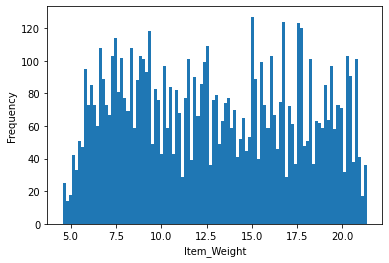

In [168]:
#Starting with continous variable features

plt.hist(train_data['Item_Weight'],bins=100)
plt.xlabel('Item_Weight')
plt.ylabel('Frequency')
plt.show()

Observation : Uniformy distributed

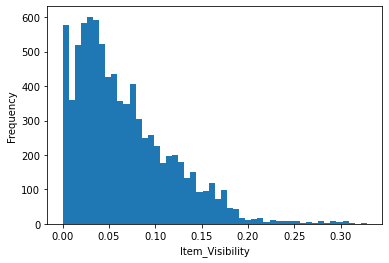

In [169]:
plt.hist(train_data['Item_Visibility'],bins=50)
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')
plt.show()

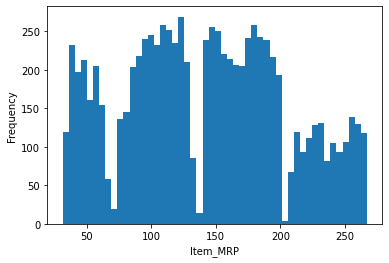

In [170]:
plt.hist(train_data['Item_MRP'],bins=50)
plt.xlabel('Item_MRP')
plt.ylabel('Frequency')
plt.show()

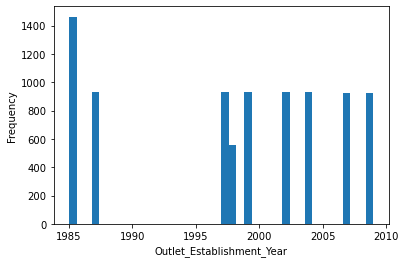

In [171]:
plt.hist(train_data['Outlet_Establishment_Year'],bins=40)
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Frequency')
plt.show()

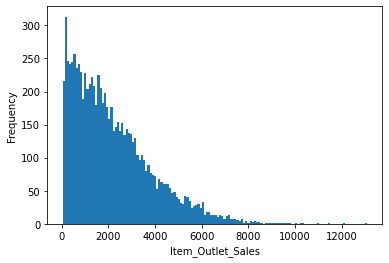

In [172]:
plt.hist(train_data['Item_Outlet_Sales'],bins=140)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

In [173]:
Combined_data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

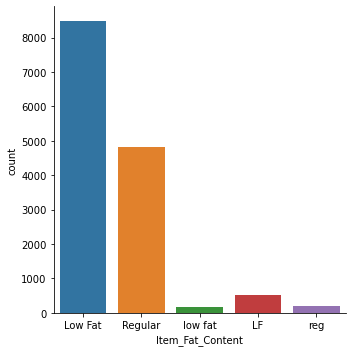

In [174]:
# Next exploring categorical features
#1)
sns.catplot(x='Item_Fat_Content',kind='count' ,data=Combined_data)

In [175]:
Combined_data['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace = True)

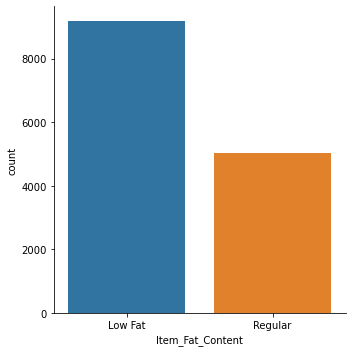

In [176]:
sns.catplot(x='Item_Fat_Content',kind='count' ,data=Combined_data)

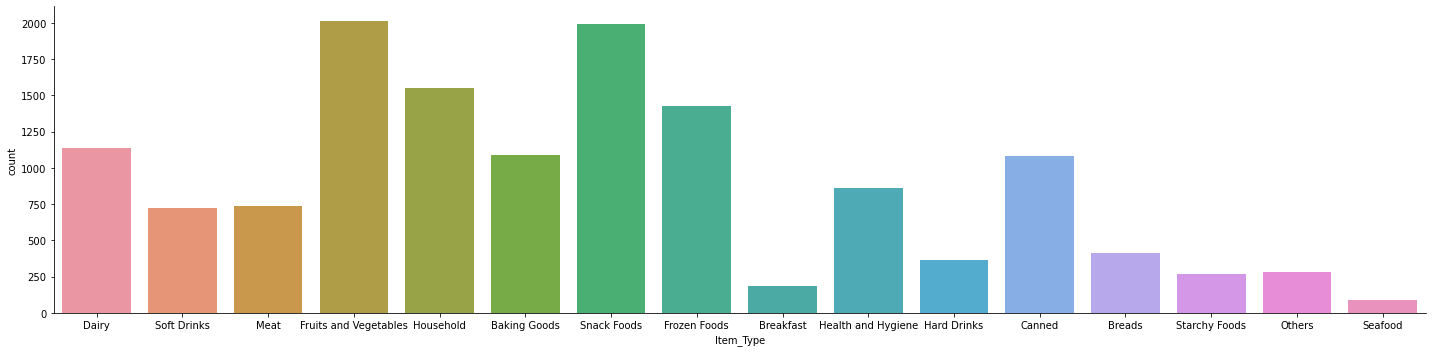

In [177]:
#2)
sns.catplot(x='Item_Type',kind='count' ,data=Combined_data,aspect=4)

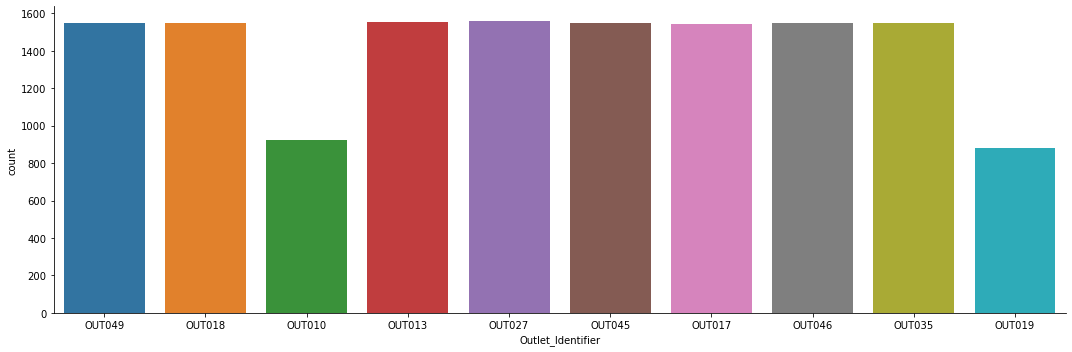

In [178]:
#3)
sns.catplot(x='Outlet_Identifier',kind='count' ,data=Combined_data,aspect=3)

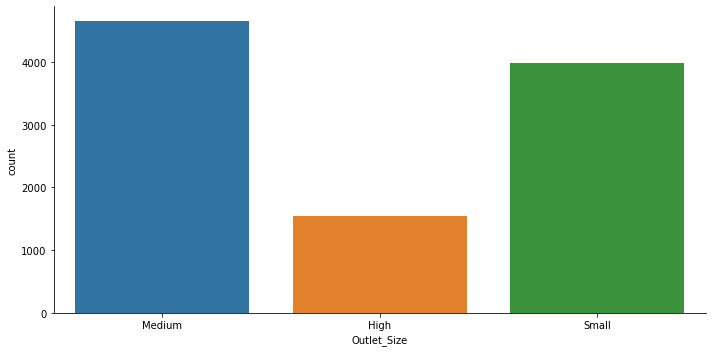

In [179]:
#4)
sns.catplot(x='Outlet_Size',kind='count' ,data=Combined_data,aspect=2)

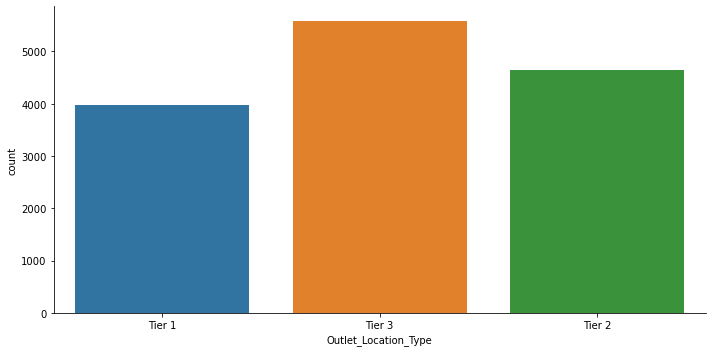

In [180]:
#5)
sns.catplot(x='Outlet_Location_Type',kind='count' ,data=Combined_data,aspect=2)

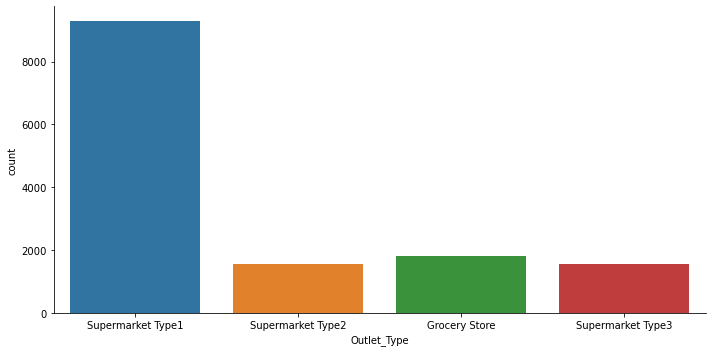

In [181]:
#6)
sns.catplot(x='Outlet_Type',kind='count' ,data=Combined_data,aspect=2)

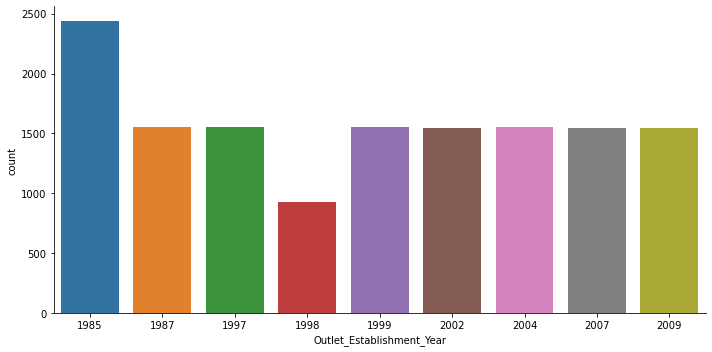

In [182]:
#7)
sns.catplot(x='Outlet_Establishment_Year',kind='count' ,data=Combined_data,aspect=2)


### 7).Bivariate Analysis

C:\Users\Deepali.Kamle\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

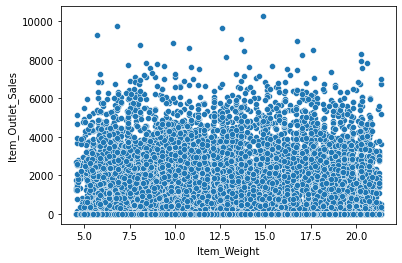

In [183]:
#Starting with continous variable features
#1)
sns.scatterplot(Combined_data['Item_Weight'],Combined_data['Item_Outlet_Sales'])

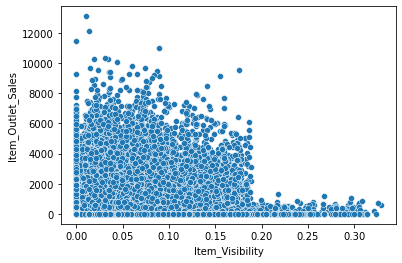

In [184]:
#2)
sns.scatterplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data = Combined_data);

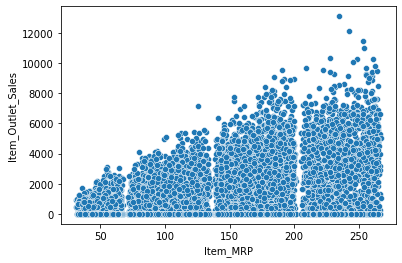

In [185]:
#3)
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = Combined_data);

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

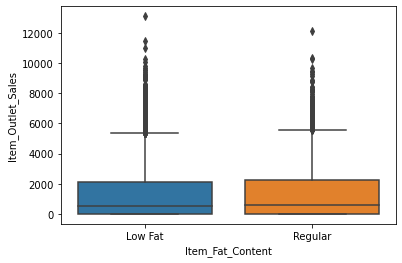

In [186]:
sns.boxplot(x ='Item_Fat_Content',y ='Item_Outlet_Sales',data = Combined_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

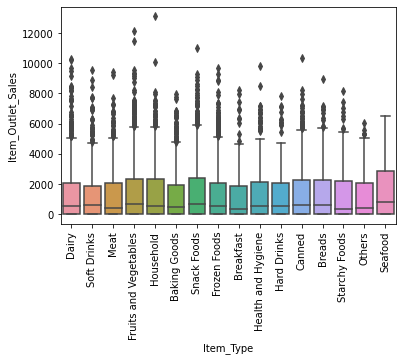

In [187]:
sns.boxplot(x ='Item_Type',y ='Item_Outlet_Sales',data = Combined_data)
plt.xticks(rotation =90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

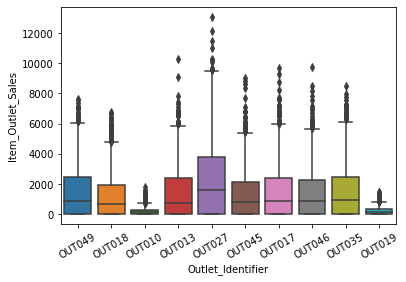

In [188]:
sns.boxplot(x ='Outlet_Identifier',y ='Item_Outlet_Sales',data = Combined_data)
plt.xticks(rotation =30)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

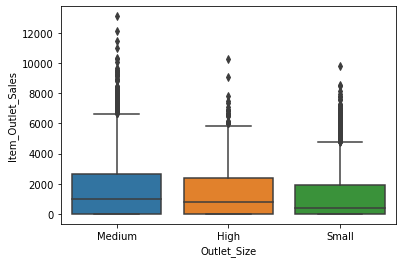

In [189]:
sns.boxplot(x ='Outlet_Size',y ='Item_Outlet_Sales',data = Combined_data)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

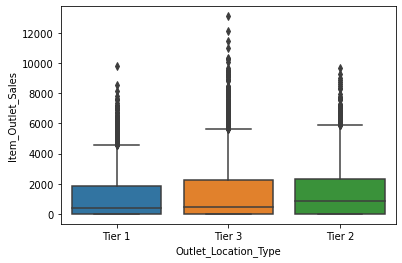

In [190]:
sns.boxplot(x ='Outlet_Location_Type',y ='Item_Outlet_Sales',data = Combined_data)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

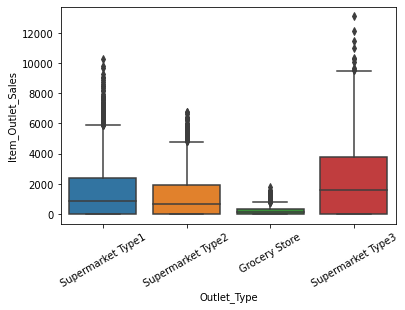

In [191]:
sns.boxplot(x ='Outlet_Type',y ='Item_Outlet_Sales',data = Combined_data)
plt.xticks(rotation =30)

In [192]:
#Next Categorical variable
#1)
#sns.swarmplot(x ='Item_Fat_Content',y ='Item_Outlet_Sales',data = Combined_data);

In [193]:
#2)
#sns.swarmplot(x ='Item_Type',y ='Item_Outlet_Sales',data = Combined_data);

In [194]:
#3)
#sns.swarmplot(x ='Outlet_Identifier',y ='Item_Outlet_Sales',data = Combined_data);

In [195]:
#4)
#sns.swarmplot(x ='Outlet_Size',y ='Item_Outlet_Sales',data = Combined_data);

In [196]:
#5)
#sns.swarmplot(x ='Outlet_Location_Type',y ='Item_Outlet_Sales',data = Combined_data);

In [197]:
#6)
#sns.swarmplot(x ='Outlet_Type',y ='Item_Outlet_Sales',data = Combined_data);

In [198]:
#Treating outliers in Item_Visibility
Combined_data=Combined_data[Combined_data['Item_Visibility']<0.20]

### 8)Missing Value Treatment

In [199]:
#Getting details of missing values in train dataset

missing_values_count=Combined_data.isnull().sum()
missing_values_count

Item_Identifier                   0
Item_Weight                    2314
Item_Fat_Content                  0
Item_Visibility                   0
Item_Type                         0
Item_MRP                          0
Outlet_Identifier                 0
Outlet_Establishment_Year         0
Outlet_Size                    3901
Outlet_Location_Type              0
Outlet_Type                       0
Item_Outlet_Sales                 0
Classifying Train/Test data       0
dtype: int64

Observation : Missing values are present in  Item_Weight and Outlet_Size features

In [200]:
Combined_data['Item_Weight'].notnull().value_counts()

True     11650
False     2314
Name: Item_Weight, dtype: int64

In [201]:
Combined_data['Outlet_Size'].notnull().value_counts()

True     10063
False     3901
Name: Outlet_Size, dtype: int64

In [202]:
#To check how much % is missing value present in Train data
total_cells=np.product(Combined_data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

3.423638807482978


Observation : 3.49% of the whole data consist of missing values

In [203]:
Combined_data['Item_Weight']=Combined_data['Item_Weight'].fillna(Combined_data['Item_Weight'].mean())

C:\Users\Deepali.Kamle\AppData\Local\Temp/ipykernel_53616/566678650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Combined_data['Item_Weight']=Combined_data['Item_Weight'].fillna(Combined_data['Item_Weight'].mean())


In [204]:
Combined_data['Outlet_Size']=Combined_data['Outlet_Size'].fillna(Combined_data['Outlet_Size'].mode().iloc[0])

C:\Users\Deepali.Kamle\AppData\Local\Temp/ipykernel_53616/3178017195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Combined_data['Outlet_Size']=Combined_data['Outlet_Size'].fillna(Combined_data['Outlet_Size'].mode().iloc[0])


In [205]:
Combined_data.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Classifying Train/Test data    0
dtype: int64

### 9)Feature Engineering,


In [206]:
#1) Numeric Feature
#a)Item_Visibility

Combined_data['Item_Visibility_bins'] = pd.cut(Combined_data['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

C:\Users\Deepali.Kamle\AppData\Local\Temp/ipykernel_53616/3246074475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Combined_data['Item_Visibility_bins'] = pd.cut(Combined_data['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])


In [207]:
Combined_data['Item_Visibility_bins'].value_counts()

Low Viz     7363
Viz         4283
High Viz    1439
Name: Item_Visibility_bins, dtype: int64

In [208]:
#% of null values resent in each features
(Combined_data.isnull().sum()/Combined_data.shape[0])*100

Item_Identifier                0.000000
Item_Weight                    0.000000
Item_Fat_Content               0.000000
Item_Visibility                0.000000
Item_Type                      0.000000
Item_MRP                       0.000000
Outlet_Identifier              0.000000
Outlet_Establishment_Year      0.000000
Outlet_Size                    0.000000
Outlet_Location_Type           0.000000
Outlet_Type                    0.000000
Item_Outlet_Sales              0.000000
Classifying Train/Test data    0.000000
Item_Visibility_bins           6.294758
dtype: float64

In [209]:
Combined_data=Combined_data[~Combined_data["Item_Visibility_bins"].isnull()]

In [210]:
train_data.isnull().sum()

Item_Identifier                   0
Item_Weight                    1463
Item_Fat_Content                  0
Item_Visibility                   0
Item_Type                         0
Item_MRP                          0
Outlet_Identifier                 0
Outlet_Establishment_Year         0
Outlet_Size                    2410
Outlet_Location_Type              0
Outlet_Type                       0
Item_Outlet_Sales                 0
Classifying Train/Test data       0
dtype: int64

### 10).Encoding Categorical Variables and 11).Label Encoding 12).One Hot Encoding/GetDummies

In [211]:
le = LabelEncoder()

In [212]:
Combined_data['Item_Fat_Content'] = Combined_data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [213]:
Combined_data['Item_Fat_Content'] = Combined_data['Item_Fat_Content'].replace('reg', 'Regular')

In [214]:
Combined_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [215]:
Combined_data['Item_Fat_Content'] = le.fit_transform(Combined_data['Item_Fat_Content'])

In [216]:
Combined_data['Item_Visibility_bins'] = le.fit_transform(Combined_data['Item_Visibility_bins'])

In [217]:
Combined_data['Outlet_Size'] = le.fit_transform(Combined_data['Outlet_Size'])

In [218]:
Combined_data['Outlet_Location_Type'] = le.fit_transform(Combined_data['Outlet_Location_Type'])

In [219]:
Combined_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

In [220]:
dummy = pd.get_dummies(Combined_data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
6,0,1,0,0
7,0,0,0,1


In [221]:
dummy = pd.get_dummies(Combined_data['Outlet_Type'],drop_first=True)
dummy.head()

,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0,0
1,0,1,0
2,1,0,0
6,1,0,0
7,0,0,1


Note : We can drop first col(Grocery store) as it does not make difference to outcome.

In [222]:
Combined_data = pd.concat([Combined_data, dummy], axis=1)
Combined_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Classifying Train/Test data,Item_Visibility_bins,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,Train data,1,1,0,0
1,DRC01,5.920000,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,Train data,1,0,1,0
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,Train data,1,1,0,0
6,FDO10,13.650000,1,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,Supermarket Type1,343.5528,Train data,1,1,0,0
7,FDP10,12.800662,0,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,Supermarket Type3,4022.7636,Train data,2,0,0,1


In [223]:
Combined_data.dtypes

Item_Identifier                 object
Item_Weight                    float64
Item_Fat_Content                 int32
Item_Visibility                float64
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Establishment_Year        int64
Outlet_Size                      int32
Outlet_Location_Type             int32
Outlet_Type                     object
Item_Outlet_Sales              float64
Classifying Train/Test data     object
Item_Visibility_bins             int32
Supermarket Type1                uint8
Supermarket Type2                uint8
Supermarket Type3                uint8
dtype: object

In [224]:
#Now we can drop all the  object types features which are not required for processing the dataset

In [225]:
Combined_data = Combined_data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year'], axis=1)

In [226]:
Combined_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Classifying Train/Test data', 'Item_Visibility_bins',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [227]:
Combined_data.tail()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Classifying Train/Test data,Item_Visibility_bins,Supermarket Type1,Supermarket Type2,Supermarket Type3
5675,13.0,1,0.070411,63.4484,1,0,0.0,Test Data,2,1,0,0
5676,10.5,1,0.013496,141.3154,2,0,0.0,Test Data,1,1,0,0
5677,7.6,1,0.142991,169.1448,1,2,0.0,Test Data,0,0,1,0
5678,10.0,0,0.073529,118.7440,1,1,0.0,Test Data,2,1,0,0
5680,9.5,1,0.104720,79.7960,1,1,0.0,Test Data,2,1,0,0


In [228]:
Combined_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Classifying Train/Test data,Item_Visibility_bins,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300000,0,0.016047,249.8092,1,0,3735.1380,Train data,1,1,0,0
1,5.920000,1,0.019278,48.2692,1,2,443.4228,Train data,1,0,1,0
2,17.500000,0,0.016760,141.6180,1,0,2097.2700,Train data,1,1,0,0
6,13.650000,1,0.012741,57.6588,0,2,343.5528,Train data,1,1,0,0
7,12.800662,0,0.127470,107.7622,1,2,4022.7636,Train data,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5675,13.000000,1,0.070411,63.4484,1,0,0.0000,Test Data,2,1,0,0
5676,10.500000,1,0.013496,141.3154,2,0,0.0000,Test Data,1,1,0,0
5677,7.600000,1,0.142991,169.1448,1,2,0.0000,Test Data,0,0,1,0
5678,10.000000,0,0.073529,118.7440,1,1,0.0000,Test Data,2,1,0,0


### 13) PreProcessing Data,14)Modeling,15)Linear Regression

In [247]:
Only_traindata=Combined_data[Combined_data['Classifying Train/Test data']=='Train data']

In [248]:
Only_traindata.shape

(7863, 12)

In [249]:
X=Only_traindata.drop(['Classifying Train/Test data','Item_Outlet_Sales'], axis=1)

In [250]:
X.shape

(7863, 10)

In [265]:
y=Only_traindata['Item_Outlet_Sales']
y.shape

(7863,)

In [281]:
Only_testdata=Combined_data[Combined_data['Classifying Train/Test data']=='Test Data']
Only_testdata

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Classifying Train/Test data,Item_Visibility_bins,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750000,0,0.007565,107.8622,1,0,0.0,Test Data,1,1,0,0
1,8.300000,1,0.038428,87.3198,1,1,0.0,Test Data,1,1,0,0
2,14.600000,0,0.099575,241.7538,1,2,0.0,Test Data,2,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,0.0,Test Data,1,1,0,0
4,12.800662,1,0.118599,234.2300,1,2,0.0,Test Data,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5675,13.000000,1,0.070411,63.4484,1,0,0.0,Test Data,2,1,0,0
5676,10.500000,1,0.013496,141.3154,2,0,0.0,Test Data,1,1,0,0
5677,7.600000,1,0.142991,169.1448,1,2,0.0,Test Data,0,0,1,0
5678,10.000000,0,0.073529,118.7440,1,1,0.0,Test Data,2,1,0,0


In [282]:
X_test=Only_testdata.drop(['Classifying Train/Test data','Item_Outlet_Sales'], axis=1)

In [283]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Visibility_bins,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750000,0,0.007565,107.8622,1,0,1,1,0,0
1,8.300000,1,0.038428,87.3198,1,1,1,1,0,0
2,14.600000,0,0.099575,241.7538,1,2,2,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,1,1,0,0
4,12.800662,1,0.118599,234.2300,1,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5675,13.000000,1,0.070411,63.4484,1,0,2,1,0,0
5676,10.500000,1,0.013496,141.3154,2,0,1,1,0,0
5677,7.600000,1,0.142991,169.1448,1,2,0,0,1,0
5678,10.000000,0,0.073529,118.7440,1,1,2,1,0,0


In [266]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=1)

In [295]:
lin = LinearRegression()

In [296]:
lin.fit(X, y)
print(lin.coef_)  
lin.intercept_

[-1.92637480e+00  3.41718462e+01 -2.31867071e+02  1.57740696e+01
  3.36447563e+01  2.54035548e+00  9.51488308e+00  1.96788163e+03
  1.64059082e+03  3.36601308e+03]


-1906.9705830709727

In [297]:
 print(np.round (lin.coef_,2))  

[-1.93000e+00  3.41700e+01 -2.31870e+02  1.57700e+01  3.36400e+01
  2.54000e+00  9.51000e+00  1.96788e+03  1.64059e+03  3.36601e+03]


In [298]:
predictions = lin.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))

1145.5917886498007


In [322]:
print("Mean Absolute Error : " + str(mean_absolute_error(ytest,predictions)))

Mean Absolute Error : 849.9975598544919


In [299]:
#Predicting Test data

In [300]:
Testdata_predictions = lin.predict(X_test)

In [301]:
#Test Data Predictions
Testdata_predictions

array([1763.77022758, 1493.2724712 , 1913.0127089 , ..., 2426.82407213,
       1952.88945039, 1366.42371774])

In [305]:
normal_LR = LinearRegression(normalize=True,fit_intercept= True)

In [306]:
normal_LR.fit(X, y)

C:\Users\Deepali.Kamle\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [309]:
normalLR_predictions = normal_LR.predict(xtest)

In [310]:
print(sqrt(mean_squared_error(ytest, normalLR_predictions)))

1145.591788649801


In [321]:
print("Mean Absolute Error : " + str(mean_absolute_error(ytest,normalLR_predictions)))

Mean Absolute Error : 849.9975598544919


### XGBoost

In [312]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [319]:
XG_model = XGBRegressor(n_estimators=100, learning_rate=0.05)
XG_model.fit(X,y)
XG_predictions = XG_model.predict(xtest)

In [323]:
print("Mean Absolute Error : " + str(mean_absolute_error(ytest,XG_predictions)))

Mean Absolute Error : 690.4217324460252


## Summary